In [2]:
import numpy as np
def generate_two_classes(num_observations):
    x1 = np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]], num_observations)
    x2 = np.random.multivariate_normal([1,4],[[1,0.75],[0.75,1]], num_observations)
    
    features = np.vstack((x1,x2)).astype(np.float32)
    labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))
    
    return features, labels

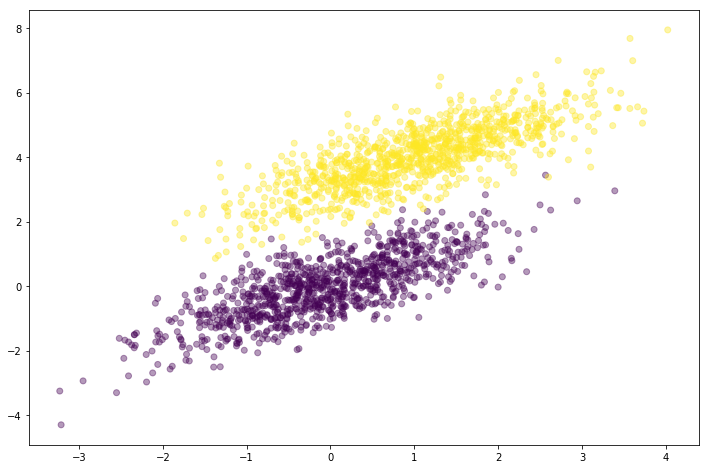

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

x,y = generate_two_classes(1000)
plt.scatter(x[:,0],x[:,1], c=y, alpha=0.4 )

### Vanilla Logistic Regression

In [4]:
def sigmoid(scores):
    return 1/(1+np.exp(-scores))

def ll_gradient(features, target, predictions):
    return np.dot(features.T, target-predictions)

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target*scores - np.log(1 + np.exp(scores)))
    return ll

class LogisticRegression:
    weights = None
    
    def fit(self, features, target, num_steps, lr, add_intercept = False):
        if add_intercept:
            intercept = np.ones((features.shape[0],1))
            features = np.hstack((intercept, features))
            
        weights = np.zeros(features.shape[1])
        
        for step in range(num_steps):
            scores = np.dot(features,weights)
            predictions = sigmoid(scores)
            
            gradient = ll_gradient(features, target, predictions)
            weights += lr*gradient
            
            if step % 10000 == 0:
                print(log_likelihood(features, target, weights))
                
        self.weights = weights
        
    def predict(self, features):
        scores = np.dot(np.hstack((np.ones((features.shape[0],1)),
                                  features)), self.weights)
        return np.round(sigmoid(scores))

In [5]:
LogR = LogisticRegression()
LogR.fit(x,y,num_steps=50000, lr = 5e-5, add_intercept=True)

-1195.62414626
-32.6421599524
-26.2611535581
-23.6119854523
-22.0930076704


In [6]:
preds = LogR.predict(x)
print('Accuracy from scratch: {0}'.format((preds==y).sum().astype(float)/len(preds)))

Accuracy from scratch: 0.997


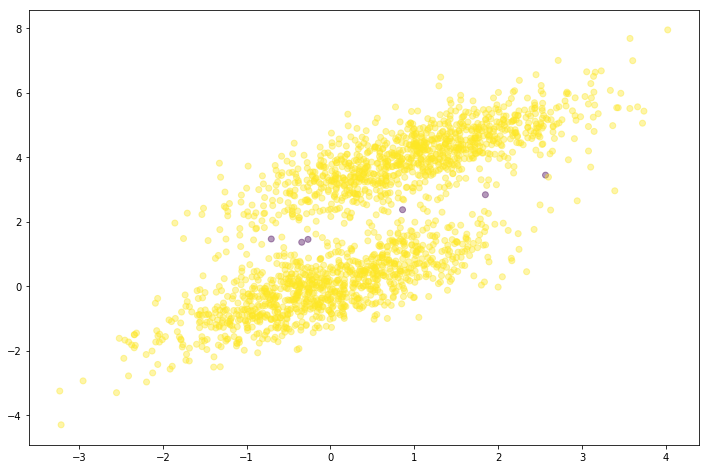

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0],x[:,1],
           c = preds==y, alpha=0.4)

### Sk-learn

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(x,y)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
print(clf.intercept_, clf.coef_)

[-21.02892435] [[ -8.25898991  12.68622886]]


In [10]:
preds = clf.predict(x)

In [11]:
print('Accuracy from sk-learn: {0}'.format(clf.score(x,y)))

Accuracy from sk-learn: 0.9975


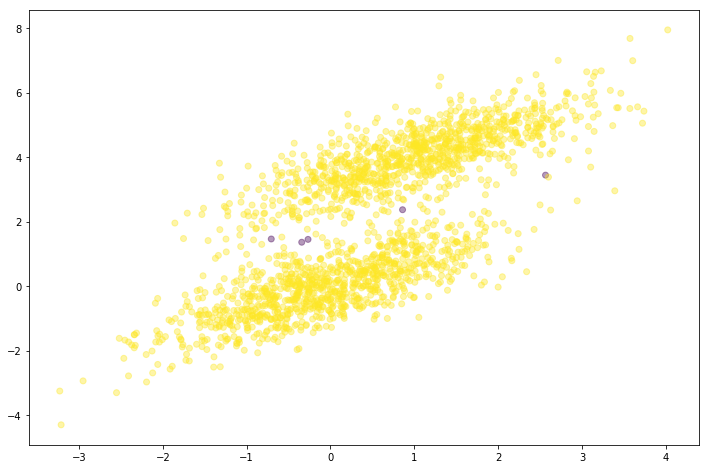

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x[:,0], x[:,1],
           c = preds==y, alpha = 0.4)